<a href="https://colab.research.google.com/github/ngoalan/Projects/blob/main/FinalCopyofReportCS105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#CS 105 Final Project (Group 17)**



# **Final Project Proposal**


**Team 17**: Tommy Grounds, Abhishek Sai Surisetty, Ritish Chilkepalli, Alan Ngo, Shashank Subramaniam


**Topic**:
Have you ever wondered how banks/credit card companies plan their finances for their future? They may encounter a new set of people defaulting on their payments every month. They need to have a predictive model to help them with this information that will let them plan their finances strategically.
We aim to predict if a person will default on his upcoming month’s credit card payment based on parameters such as Credit limit, sex, education level, marital status, age, and past 6 months payment history.

**Dataset**:
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


**Questions / Goals**
We first plan on performing EDA and get a sense of the data and other interesting patterns/ information.
Our primary goal is to use different supervised classification methods and compare their results.
We also aim to perform clustering analysis which may reveal segments such as (High Credit Limit, Low Risk) Individuals, (High Credit Limit, High Risk) Individuals, (Low Credit Limit, Low Risk) Individuals, (Low Credit Limit, High Risk) individuals, / Responsible Payers, Delayed Payers, etc.
Hypothesis: People who did not pay their bill the majority of the times in the past 6 months will default the next month irrespective of their age, sex, marital status, etc
Hypothesis: People with a higher credit are less likely to default


**Algorithms**:
We plan on using the following algorithms:
**Supervised**:
KNN Classification
Decision Trees / Random Forest
Logistic Regression
Naive Bayes

**Unsupervised**:
K Means Clustering


Note: Used algorithms are subject to change.


# **Project Description**

This project aims to predict credit card payment defaults using factors like credit limit, demographics, and past payment history, utilizing a dataset from the UCI Machine Learning Repository. It will compare various supervised classification algorithms such as KNN, Decision Trees/Random Forest, Logistic Regression, Naive Bayes, and employ K Means Clustering for customer segmentation. The goal is to identify patterns that indicate the likelihood of default, assisting financial institutions in risk management and strategic planning.

**Description of the Dataset:**

Dataset:
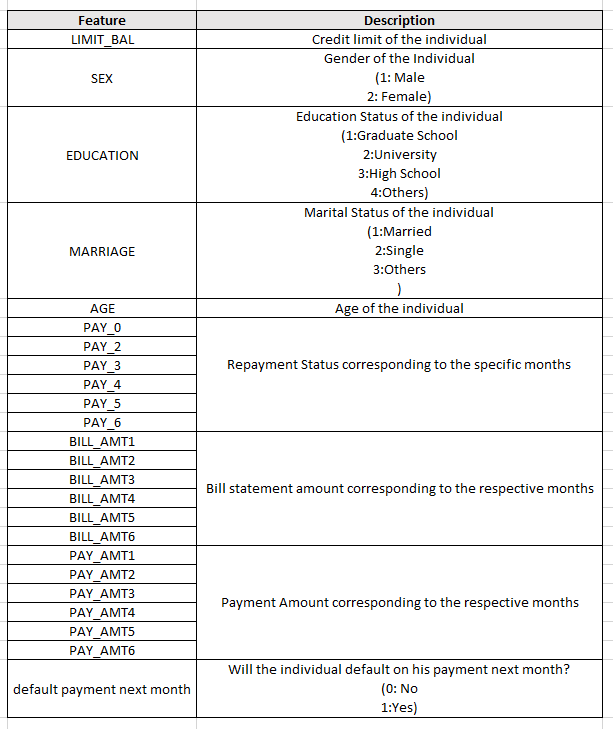

Loading the Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

frames = [X, y]

df = pd.concat(frames,axis=1)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Renaming the columns
#1-5 (Ritish)
new_column_names = {
    'X1': 'amt_credit',
    'X2': 'gender',
    'X3': 'education',
    'X4': 'marital_status',
    'X5': 'age',
#6-11 (Abhishek)
    'X6': 'pay_sep',
    'X7': 'pay_aug',
    'X8': 'pay_jul',
    'X9': 'pay_jun',
    'X10': 'pay_may',
    'X11':'pay_apr',
    #MonthlyPaymentRecord

#12-17 (Shashank) #bill_sept = September bill amount
    "X12":"bill_sep",
    "X13":"bill_aug",
    "X14":"bill_jul",
    "X15":"bill_jun",
    "X16":"bill_may",
    "X17":"bill_apr",

#Tommy 18-23
    'X18': 'pre_sep',
    'X19': 'pre_aug',
    'X20': 'pre_jul',
    'X21': 'pre_jun',
    'X22': 'pre_may',
    'X23': 'pre_apr',
    'Y': 'willDefault'
    #Amount of previous payment (NT dollar)
}

df.rename(columns=new_column_names, inplace=True)

print(df.head())

   amt_credit  gender  education  marital_status  age  pay_sep  pay_aug  \
0       20000       2          2               1   24        2        2   
1      120000       2          2               2   26       -1        2   
2       90000       2          2               2   34        0        0   
3       50000       2          2               1   37        0        0   
4       50000       1          2               1   57       -1        0   

   pay_jul  pay_jun  pay_may  ...  bill_jun  bill_may  bill_apr  pre_sep  \
0       -1       -1       -2  ...         0         0         0        0   
1        0        0        0  ...      3272      3455      3261        0   
2        0        0        0  ...     14331     14948     15549     1518   
3        0        0        0  ...     28314     28959     29547     2000   
4       -1        0        0  ...     20940     19146     19131     2000   

   pre_aug  pre_jul  pre_jun  pre_may  pre_apr  willDefault  
0      689        0        0  

# **Data Cleaning**

**Source of the dataset:**#https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

As per the dataset's description:

 1)The Education feature should have the following values:(1 = graduate school; 2 = university; 3 = high school; 4 = others). However the dataset has few entries which are 0,5,6. We have decided to replace all the 0's,5's and 6's with a 4

2) The marital status feature should have the following values: (1 = Married; 2=Single; 3=Others). However, the dataset has a few entries which are 0. We have decided to replace 0 with 3

3)The Repayment status feature should have the following values:(-1= No delay in payment; [1-9]: Payment delayed by respective months). However, the dataset has a few -2s and -1s. We have decided to replace them with a 0.

In [ ]:


#Replacing all 0's,5's and 6's with 4
df['education']=df['education'].replace(0,4).replace(5,4).replace(6,4)

#Marital Status
df['marital_status']=df['marital_status'].replace(0,3)

In [ ]:
#Repayment Status
test_columns=['pay_sep', 'pay_aug', 'pay_jul', 'pay_jun','pay_may','pay_apr']
df[test_columns]=df[test_columns].replace(-2,0).replace(-1,0)

# **EDA and Feature selection**

1)Gender vs Default Status

Text(0.5, 1.0, 'Gender vs Percentage of People Defaulting in that particular class ')

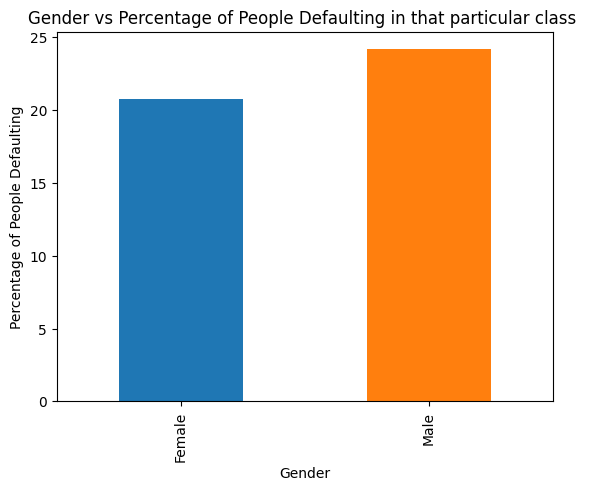

In [ ]:
import matplotlib.pyplot as plt
df_plot=df.copy()
df_plot["gender"]=df["gender"].map({1:"Male",2:"Female"})
grouped_data = df_plot.groupby('gender')['willDefault'].mean() * 100
grouped_data.plot(kind='bar', color=['C0', 'C1'])
plt.xlabel('Gender')
plt.ylabel('Percentage of People Defaulting')
plt.title("Gender vs Percentage of People Defaulting in that particular class ")


**Observation:**We can observe that the percentage of men defaulting is greater than that of women

2) Education Level v/s Default Status

Text(0.5, 1.0, 'Level of Education vs Percentage of People Defaulting in that particular class')

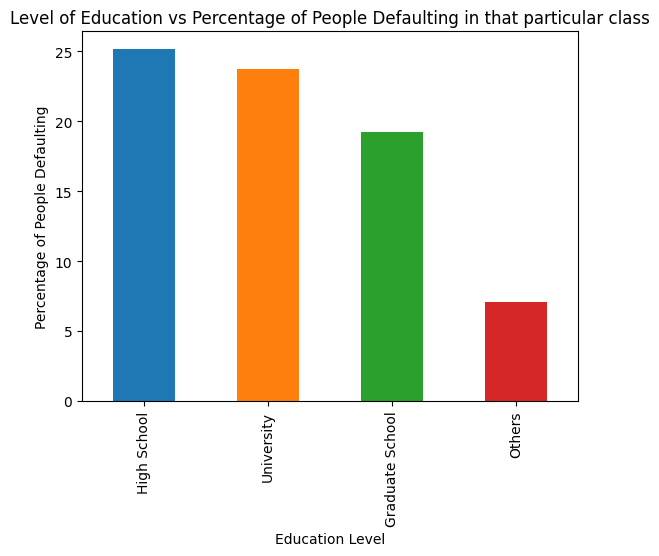

In [ ]:
import matplotlib.pyplot as plt
df_plot=df.copy()
df_plot["education"]=df["education"].map({1:"Graduate School",2:"University",3:"High School",4:"Others"})
reorder_order = ['High School', 'University', 'Graduate School', 'Others']
grouped_data = df_plot.groupby('education')['willDefault'].mean() * 100
grouped_data=grouped_data.reindex(index=reorder_order)
grouped_data.plot(kind='bar', color=['C0', 'C1','C2','C3'])
plt.xlabel('Education Level')
plt.ylabel('Percentage of People Defaulting')
plt.title("Level of Education vs Percentage of People Defaulting in that particular class")

**Observation:**People having better education levels are less likely to default when compared to others having lower levels of educaiton

3) Distribution of the Credit Limit

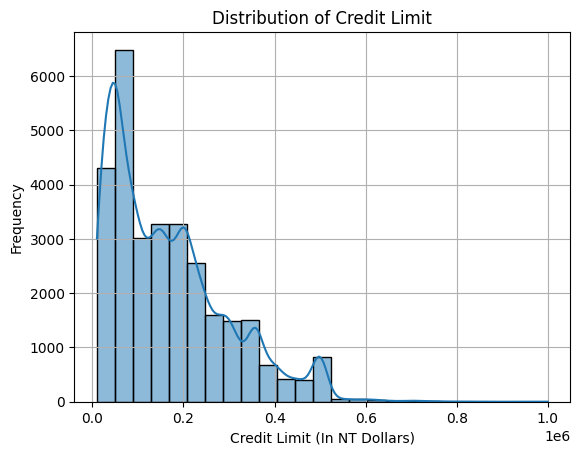

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['amt_credit'], bins=25,kde=True)
plt.xlabel('Credit Limit (In NT Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Limit')
plt.grid(True)
plt.show()

**Observation:**Mode of the credit limit occurs at the lower end and the percentage of people having a very high credit limit is very less which is ine lines with what one expects

4) Age Group v/s Default Status

In [ ]:
print("Minimum Age:",df['age'].min())
print("Maximunm Age:",df['age'].max())

Minimum Age: 21
Maximunm Age: 79


This dataset has people aged between 21 and 79

Classifying them into their respective groups:
*   21 - 30: Young Adults
*   31 - 45: Middle Aged Adults
*   46 - 60: Old Adults
*   61 - 79: Senior Adults





In [ ]:
df_plot = df.copy()

df_plot['ageClass'] = ""

for i in df_plot.index:
    age = df_plot.at[i, 'age']
    if (21 <= age <= 30):
        df_plot.at[i, 'ageClass'] = "Young Adults"
    elif (31 <= age <= 45):
        df_plot.at[i, 'ageClass'] = "Middle Aged Adults"
    elif (46 <= age <= 60):
        df_plot.at[i, 'ageClass'] = "Old Adults"
    else:
        df_plot.at[i, 'ageClass'] = "Seniors"


Text(0.5, 1.0, 'Age Group vs Percentage of People Defaulting ')

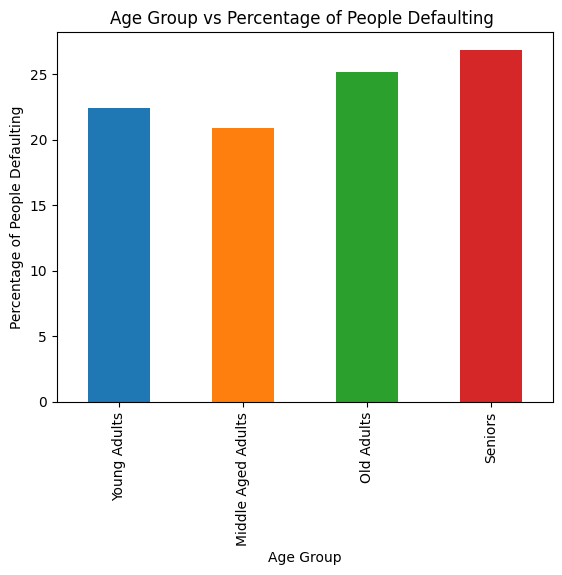

In [ ]:
import matplotlib.pyplot as plt

reorder_order = ['Young Adults', 'Middle Aged Adults', 'Old Adults', 'Seniors']

grouped_data = df_plot.groupby('ageClass')['willDefault'].mean() * 100

grouped_data=grouped_data.reindex(index=reorder_order)
grouped_data.plot(kind='bar', color=['C0', 'C1','C2','C3'])
plt.xlabel('Age Group')
plt.ylabel('Percentage of People Defaulting')
plt.title("Age Group vs Percentage of People Defaulting ")

**Observation:** The percentage of people defaulting the most is Seniors. Middle Aged Adults spend their credit responsibly when compared to others

5) Credit Limit v/s Default Status

In [ ]:
df['amt_credit'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: amt_credit, dtype: float64

Classifying people based on their credit limit into the following four categories:( We used information of what percentile that particular individual falls into)


1.   Low Credit Limit
2.   Medium Credit Limit
3.   High Credit Limit
4.   Very High Credit Limit





In [ ]:
df_plot=df.copy()
Q1 = df_plot['amt_credit'].quantile(0.25)
Q2 = df_plot['amt_credit'].quantile(0.75)
Q3 = df_plot['amt_credit'].quantile(0.9)

low_limit = Q1
medium_limit = Q2
high_limit = Q3
very_high_limit = df['amt_credit'].max()

#print(Q1,Q2,Q3,very_high_limit)

def classify_credit_limit(limit):
    if limit <= low_limit:
        return 'Low Credit Limit'
    elif low_limit < limit <= medium_limit:
        return 'Medium Credit Limit'
    elif medium_limit < limit <= high_limit:
        return 'High Credit Limit'
    elif high_limit < limit <= very_high_limit:
        return 'Very High Credit Limit'

df_plot['credit_limit_category'] = df_plot['amt_credit'].apply(classify_credit_limit)

In [ ]:
#df_plot['credit_limit_category'].head()

Text(0.5, 1.0, 'Credit Limit Category vs Percentage of People Defaulting in that particular class')

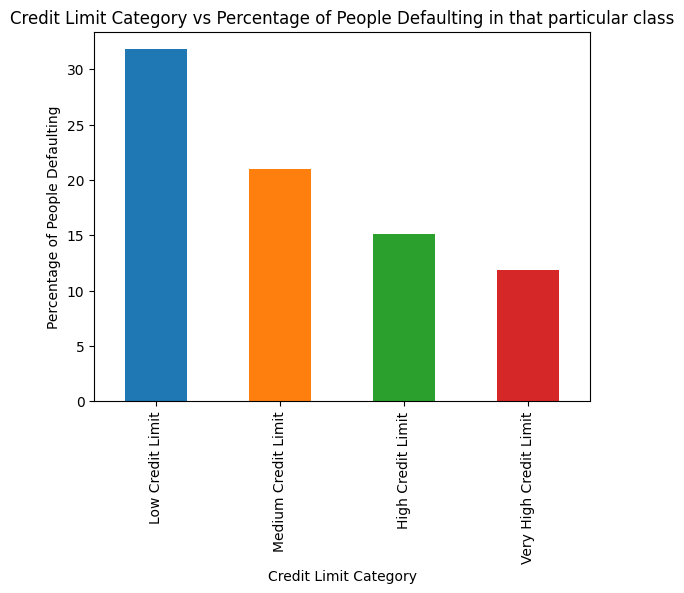

In [ ]:
import matplotlib.pyplot as plt

reorder_order = ['Low Credit Limit', 'Medium Credit Limit', 'High Credit Limit', 'Very High Credit Limit']

grouped_data = df_plot.groupby('credit_limit_category')['willDefault'].mean() * 100
grouped_data=grouped_data.reindex(index=reorder_order)
grouped_data.plot(kind='bar', color=['C0', 'C1','C2','C3'])
plt.xlabel('Credit Limit Category')
plt.ylabel('Percentage of People Defaulting')
plt.title("Credit Limit Category vs Percentage of People Defaulting in that particular class")

**Observation:** As one's credit limit increases they are less likey to default on their payment

6)Data Distribution (Number of People Defaulting and Not Defaulting)

Text(0.5, 1.0, 'Number of people v/s Defaulting status')

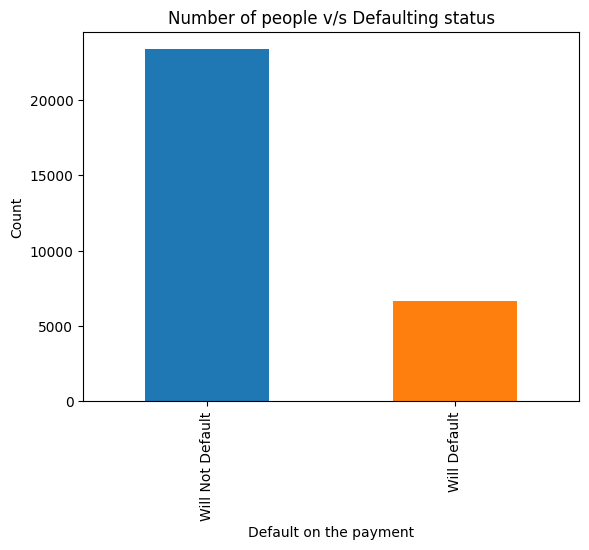

In [ ]:
df_plot=df.copy()
df_plot["willDefault"]=df["willDefault"].map({0:"Will Not Default",1:"Will Default"})

df_plot['willDefault'].value_counts().plot(kind='bar',color=['C0', 'C1'])
plt.xlabel("Default on the payment")
plt.ylabel("Count")
plt.title("Number of people v/s Defaulting status")

**Observation:** The data is imbalanced. We can handle this by either oversampling or undersampling.

We are going to run our algorithms on both the imbalanced data and balanced data and going to compare the performances of our algorithms

7) Correlation Matrix for feature Selection**

As per the domain knowledge, all the features available seem to be important to make the classification.

We want to see if there is a correlation between any specific features and can be eliminated

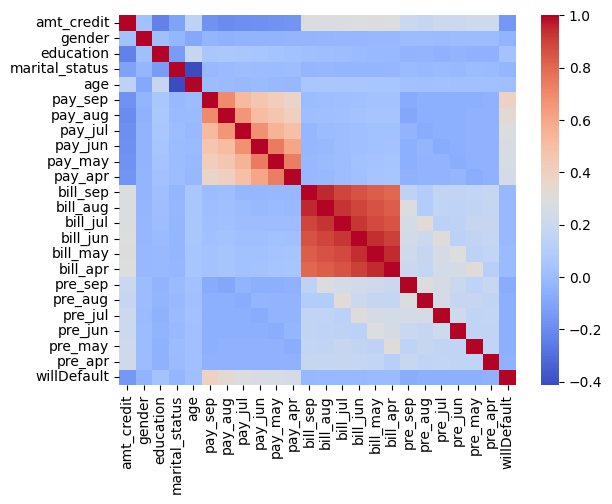

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),cmap='coolwarm', fmt=".2f")
plt.show()

**Observation:**Even though there seems to be a correlation between the bill amounts of consecutive months, we are not eliminating them since there is no correlation between the amounts paid feature for the same set of months. These both together give more context

# **Supervised Learning Algorithms**

## **Imbalanced Data** ##

## **Random Forest**

In [ ]:
X = df.drop(['willDefault'], axis=1)
y = df['willDefault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("\nShape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (24000, 23)
Shape of X_test:  (6000, 23)

Shape of y_train:  (24000,)
Shape of y_test:  (6000,)


In [ ]:
pipeline = Pipeline(steps=[
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [ ]:
#Predicting on Test Data
y_pred = pipeline.predict(X_test)  # testing
y_prob = pipeline.predict_proba(X_test)[:, 1]

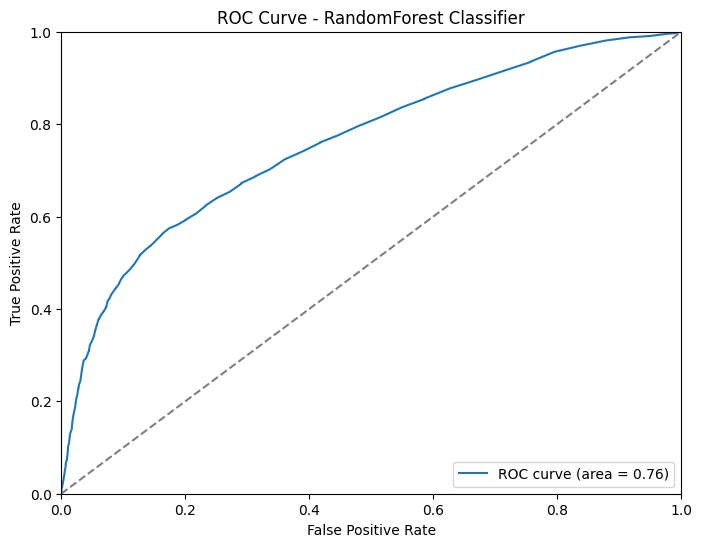

In [ ]:
#Compute and plot the ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6)) # creating a figure of size (8,6)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})') # plotting ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest Classifier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score (calculated with y_pred): {roc_auc}")
print(f"ROC-AUC Score (calculated with y_prob): {roc_auc_value}")

Accuracy: 0.8163333333333334
Precision: 0.6408544726301736
Recall: 0.3655750190403656
F1 Score: 0.46556741028128035
ROC-AUC Score (calculated with y_pred): 0.654091115238126
ROC-AUC Score (calculated with y_prob): 0.7591802836222309


Accuracy(81.68%): This model has a decent amount of accuracy

Precision(64.30%): When the model predicts that someone will default, it is true 64.4%

Recall(33.63%):The model is only able to identify 33.6% of the cases where people default.

F1Score(46.67%):F1 score is relaively low which implies that this model is not robust.

ROC-AUC Score (Y_Pred): The models ability to disitinguish between someone defaulting and not defaulting is ~65.54%

ROC-AUC Score (Y_Prob): This value is relatively higher than that of the above. This indicates tat the models ability to classify  by the likelihood is better!

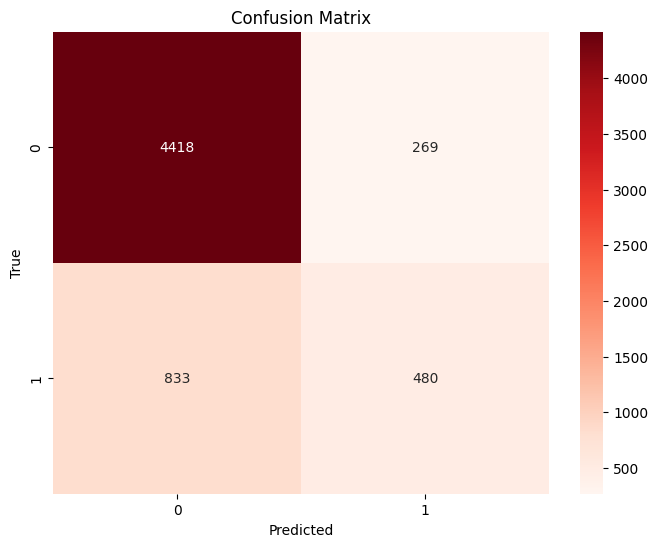

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **KNN Classification**

We run the KNN for different values of K and chose the appropriate value for K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reset the accuracy list in case this is being rerun
accuracy_list = []
precision_list = []
recall_list = []

# Ensure the loop covers the range from 1 to 50
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use raw data for training
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    # Print statement to confirm each K value is processed
    #print(f'K={k}, Accuracy={accuracy:.4f}')
    print(f'K={k},Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}')

K=1,Accuracy=0.6910, Precision=0.5452, Recall=0.5445
K=2,Accuracy=0.7638, Precision=0.5787, Recall=0.5278
K=3,Accuracy=0.7365, Precision=0.5776, Recall=0.5578
K=4,Accuracy=0.7658, Precision=0.5904, Recall=0.5335
K=5,Accuracy=0.7557, Precision=0.5906, Recall=0.5506
K=6,Accuracy=0.7690, Precision=0.5893, Recall=0.5268
K=7,Accuracy=0.7577, Precision=0.5820, Recall=0.5390
K=8,Accuracy=0.7720, Precision=0.6013, Recall=0.5289
K=9,Accuracy=0.7692, Precision=0.6085, Recall=0.5439
K=10,Accuracy=0.7760, Precision=0.6173, Recall=0.5296
K=11,Accuracy=0.7738, Precision=0.6212, Recall=0.5441
K=12,Accuracy=0.7752, Precision=0.6117, Recall=0.5277
K=13,Accuracy=0.7728, Precision=0.6145, Recall=0.5393
K=14,Accuracy=0.7758, Precision=0.6148, Recall=0.5278
K=15,Accuracy=0.7730, Precision=0.6115, Recall=0.5353
K=16,Accuracy=0.7790, Precision=0.6314, Recall=0.5282
K=17,Accuracy=0.7760, Precision=0.6218, Recall=0.5348
K=18,Accuracy=0.7785, Precision=0.6277, Recall=0.5271
K=19,Accuracy=0.7763, Precision=0.620

In [ ]:
# from sklearn.metrics import precision_score, recall_score

# precision_list = []
# recall_list = []

# # Loop over K values
# for k in range(1, 51):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)

#     precision = precision_score(y_test, y_pred, average='macro')
#     recall = recall_score(y_test, y_pred, average='macro')

#     precision_list.append(precision)
#     recall_list.append(recall)

#     print(f'K={k}, Precision={precision:.4f}, Recall={recall:.4f}')


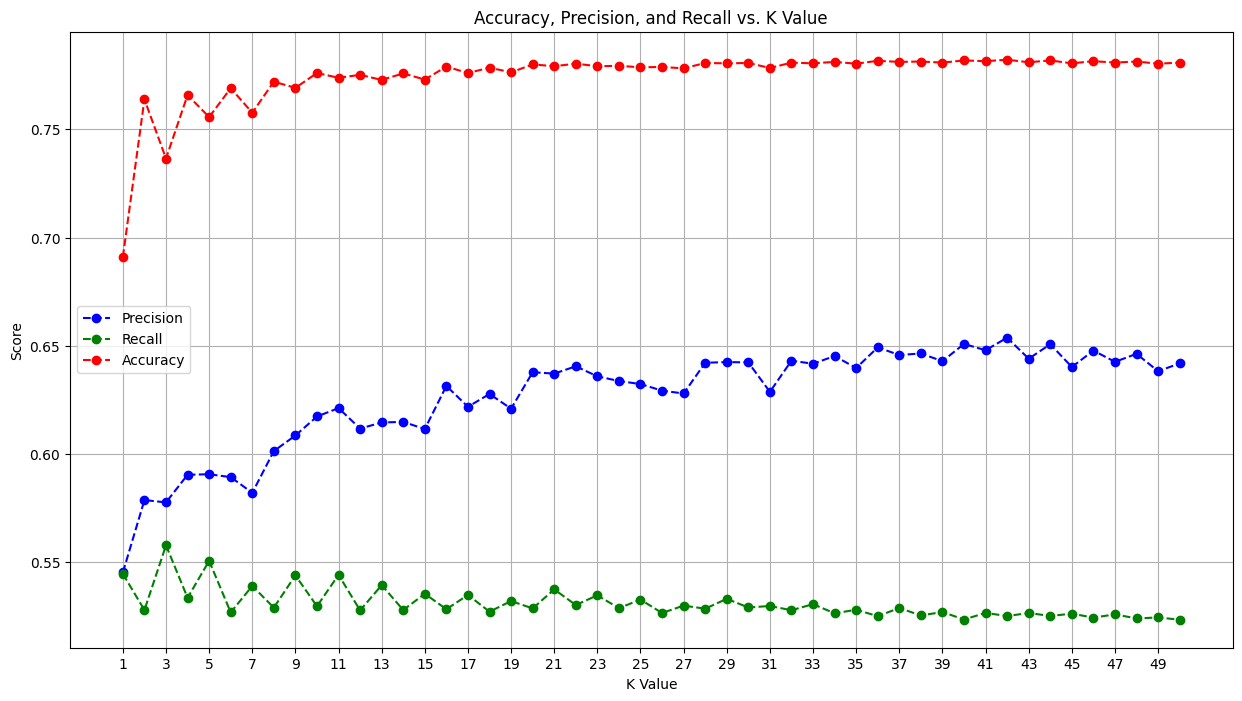

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 51), precision_list, label='Precision', marker='o', linestyle='dashed', color='blue')
plt.plot(range(1, 51), recall_list, label='Recall', marker='o', linestyle='dashed', color='green')
plt.plot(range(1, 51), accuracy_list, label='Accuracy', marker='o', linestyle='dashed', color='red')
plt.title('Accuracy, Precision, and Recall vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.xticks(range(1, 51, 2))
plt.legend()
plt.grid(True)
plt.show()


As we can see above, the best KNN value to choose is 42 because the accuracy score for testing it with KNN = 4 is 0.7822 (78.22%). Precision and recall scores are decent when compared to the values that we get for other 'K's.

In [ ]:
# Finding the best K value for accuracy
best_k_accuracy = accuracy_list.index(max(accuracy_list)) + 1
best_accuracy = max(accuracy_list)
print(f'The best K value for accuracy is {best_k_accuracy} with an accuracy of {best_accuracy:.4f}')

# Finding the best K value for precision
best_k_precision = precision_list.index(max(precision_list)) + 1
best_precision = max(precision_list)
print(f'The best K value for precision is {best_k_precision} with a precision of {best_precision:.4f}')

# Finding the best K value for recall
best_k_recall = recall_list.index(max(recall_list)) + 1
best_recall = max(recall_list)
print(f'The best K value for recall is {best_k_recall} with a recall of {best_recall:.4f}')


The best K value for accuracy is 42 with an accuracy of 0.7822
The best K value for precision is 42 with a precision of 0.6537
The best K value for recall is 3 with a recall of 0.5578


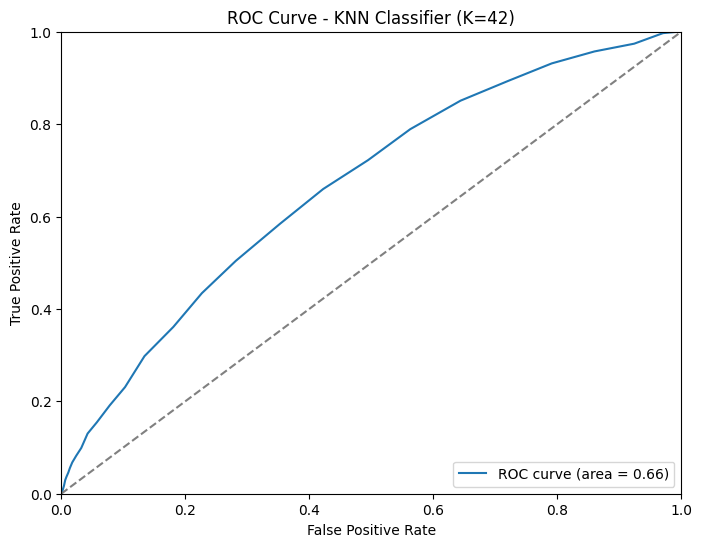

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure you're using the raw data split
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)  # Use the raw training data

# Predict probabilities for the test set
y_prob = knn.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier (K=42)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Fit the KNN Classifier with K=42, using the raw data
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc_pred = roc_auc_score(y_test, y_pred)  # ROC-AUC based on the predictions
roc_auc_prob = roc_auc_score(y_test, y_prob)  # ROC-AUC based on the probability estimates

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score(y_pred): {roc_auc_pred:.4f}")
print(f"ROC-AUC Score (y_prob): {roc_auc_prob:.4f}")


Accuracy: 0.7822
Precision: 0.5174
Recall: 0.0678
F1 Score: 0.1199
ROC-AUC Score(y_pred): 0.5250
ROC-AUC Score (y_prob): 0.6649


The model exhibits a decent accuracy but a very poor recall. (This is due to the imbalance in the dataset). We are expecting the performance to improve after oversampling.

The area under ROC curve with y_prob is 0.6649 (>0.5) which indicates that the model is better than a model that randomly classifies.

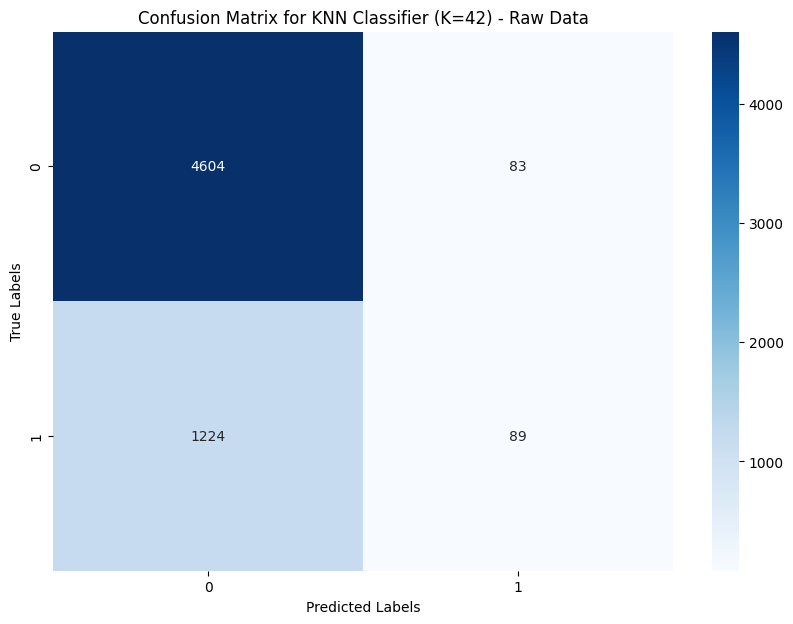

In [ ]:
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)  # Fit using the raw training data
y_pred = knn.predict(X_test)  # Predictions on the raw test data
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier (K=42) - Raw Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



## **Logistic Regression**

In [ ]:
X = df.drop(['willDefault'], axis=1)
y = df['willDefault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline(steps=[
    ('model', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('model', LogisticRegression(max_iter=500))])

In [ ]:
#Predicting on Test Data
y_pred = pipeline.predict(X_test)  # testing
y_prob = pipeline.predict_proba(X_test)[:, 1]

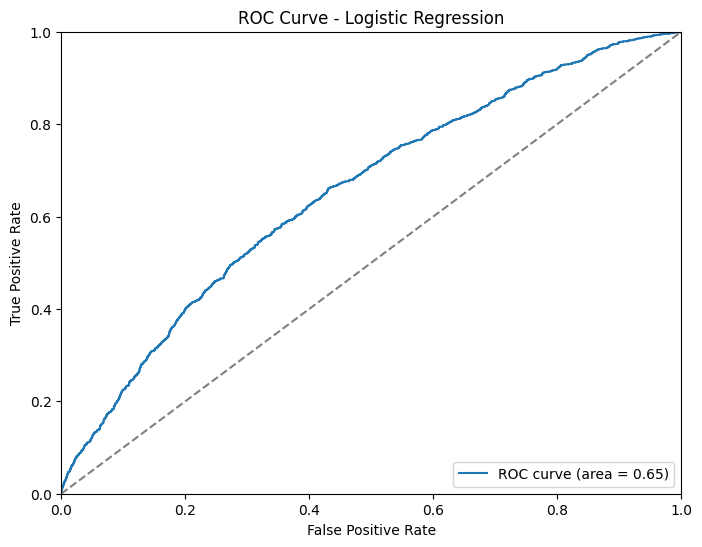

In [ ]:
#Compute and plot the ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6)) # creating a figure of size (8,6)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})') # plotting ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score(y_pred): {roc_auc}")
print(f"ROC-AUC Score (y_prob): {roc_auc_value}")

Accuracy: 0.7811666666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score(y_pred): 0.5
ROC-AUC Score (y_prob): 0.6528958011423732


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy is decent but precision and recall both are 0. This is due to the heavy imbalance in the dataset. We expect the model to substantially improve after the oversampling. The Area under curve of ROC curve suggests that the model is slightly better than a model that classifies randomly.

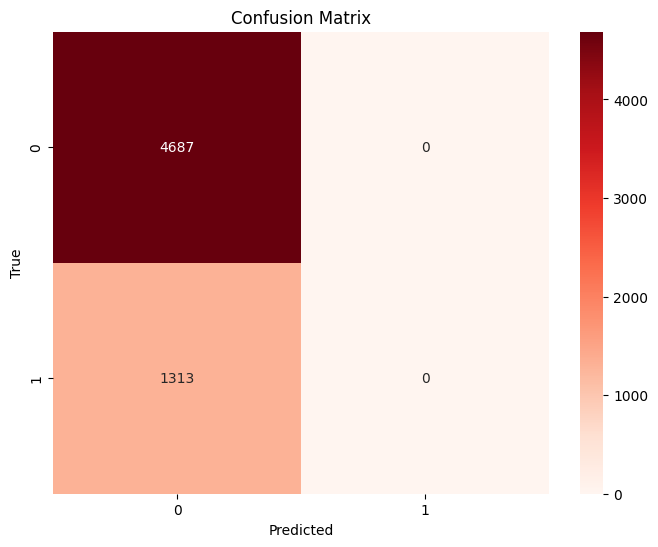

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **Naive Bayes**

In [ ]:
X = df.drop(['willDefault'], axis=1)
y = df['willDefault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline(steps=[
    ('model', GaussianNB())
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('model', GaussianNB())])

In [ ]:
#Predicting on Test Data
y_pred = pipeline.predict(X_test)  # testing
y_prob = pipeline.predict_proba(X_test)[:, 1]

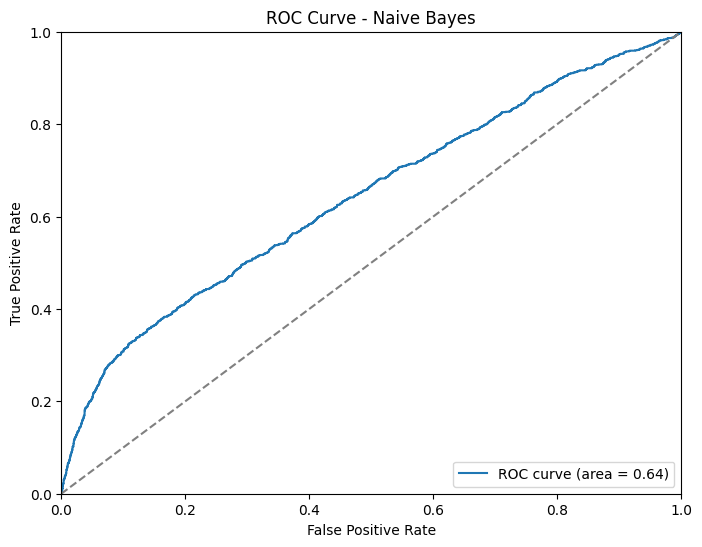

In [ ]:
#Compute and plot the ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6)) # creating a figure of size (8,6)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})') # plotting ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score(y_pred): {roc_auc}")
print(f"ROC-AUC Score (y_prob): {roc_auc_value}")

Accuracy: 0.351
Precision: 0.23885737439222043
Recall: 0.8958966565349544
F1 Score: 0.3771593090211133
ROC-AUC Score(y_pred): 0.546902213835368
ROC-AUC Score (y_prob): 0.6405914592520876


The recall value is very good but at the cost of accuracy and precision. The Area under curve of ROC curve suggests that the model is slightly better than a model that classifies randomly.

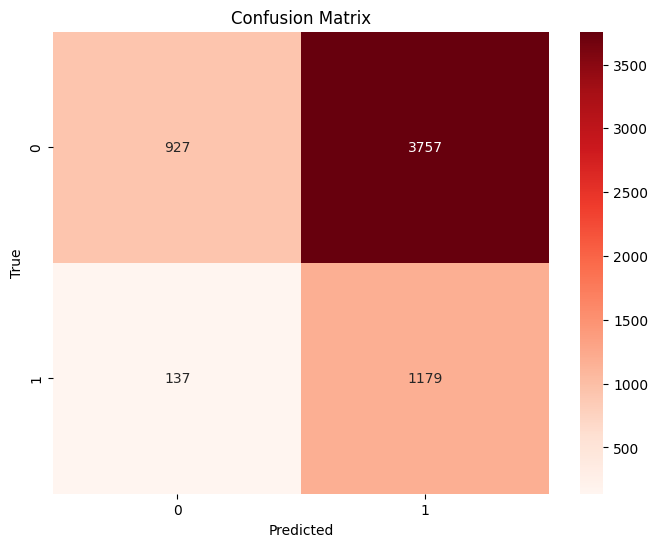

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **Balanced Data** ##

***Oversampling***: We are performing oversampling using SMOTE

## **Random Forest**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class counts after resampling
print(y_resampled.value_counts())

0    18677
1    18677
Name: willDefault, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("\nShape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (29883, 23)
Shape of X_test:  (7471, 23)

Shape of y_train:  (29883,)
Shape of y_test:  (7471,)


In [ ]:
pipeline = Pipeline(steps=[
    ('model', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

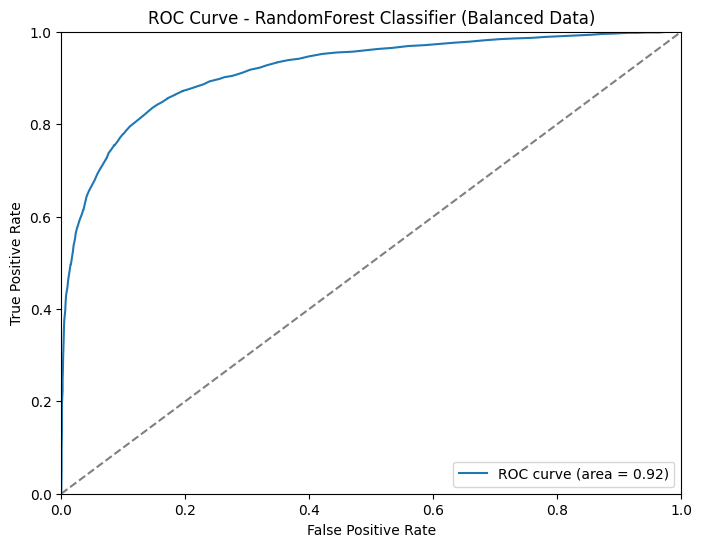

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest Classifier (Balanced Data)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score (calculated with y_pred): {roc_auc}")
print(f"ROC-AUC Score (calculated with y_prob): {roc_auc_value}")

Accuracy: 0.8433944585731495
Precision: 0.8569844789356984
Recall: 0.8254137746930059
F1 Score: 0.8409029099809628
ROC-AUC Score (calculated with y_pred): 0.8434451423800601
ROC-AUC Score (calculated with y_prob): 0.9170222555065448


The accuracy has slightly improved when compared to the model being run on original dataset. Precision and recall values have improved by a very good margin. The high AUC for ROC graph indicates that the model can differentiate very well between both the classes.

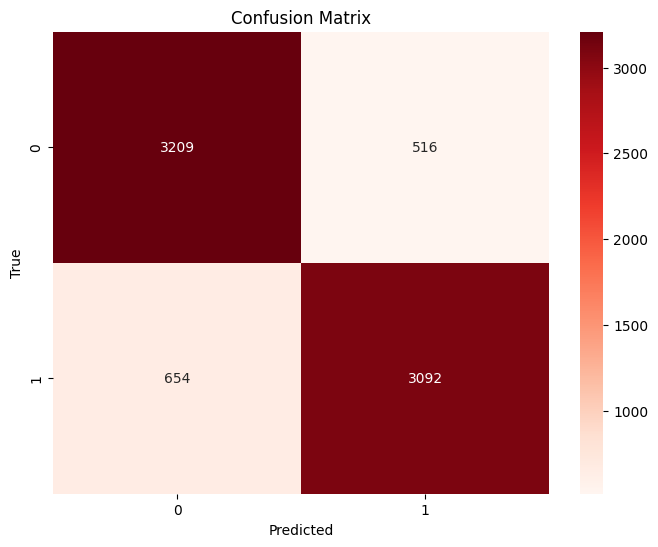

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## **KNN Classification**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score


In [ ]:

from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class counts after resampling
print(y_resampled.value_counts())

0    18677
1    18677
Name: willDefault, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Reset the accuracy list in case this is being rerun
accuracy_list = []
precision_list = []
recall_list = []

# Ensure the loop covers the range from 1 to 50
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use raw data for training
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    # Print statement to confirm each K value is processed
    #print(f'K={k}, Accuracy={accuracy:.4f}')
    print(f'K={k},Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}')

K=1,Accuracy=0.8232, Precision=0.8374, Recall=0.8229
K=2,Accuracy=0.8024, Precision=0.8024, Recall=0.8024
K=3,Accuracy=0.7699, Precision=0.7872, Recall=0.7696
K=4,Accuracy=0.7678, Precision=0.7693, Recall=0.7677
K=5,Accuracy=0.7465, Precision=0.7613, Recall=0.7462
K=6,Accuracy=0.7466, Precision=0.7485, Recall=0.7465
K=7,Accuracy=0.7277, Precision=0.7417, Recall=0.7274
K=8,Accuracy=0.7249, Precision=0.7273, Recall=0.7248
K=9,Accuracy=0.7161, Precision=0.7283, Recall=0.7158
K=10,Accuracy=0.7158, Precision=0.7190, Recall=0.7157
K=11,Accuracy=0.7081, Precision=0.7191, Recall=0.7078
K=12,Accuracy=0.7086, Precision=0.7122, Recall=0.7084
K=13,Accuracy=0.6994, Precision=0.7110, Recall=0.6990
K=14,Accuracy=0.7014, Precision=0.7050, Recall=0.7012
K=15,Accuracy=0.6923, Precision=0.7030, Recall=0.6920
K=16,Accuracy=0.6931, Precision=0.6973, Recall=0.6929
K=17,Accuracy=0.6876, Precision=0.6971, Recall=0.6873
K=18,Accuracy=0.6875, Precision=0.6918, Recall=0.6872
K=19,Accuracy=0.6817, Precision=0.691

In [ ]:
# # Initialize lists to store precision and recall values
# precision_list = []
# recall_list = []

# # Loop over K values
# for k in range(1, 51):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_resampled, y_resampled)  # Use the correct variable names for your resampled data
#     y_pred = knn.predict(X_test)

#     # Calculate precision and recall
#     precision = precision_score(y_test, y_pred, average='macro')
#     recall = recall_score(y_test, y_pred, average='macro')

#     precision_list.append(precision)
#     recall_list.append(recall)

#     print(f'K={k}, Precision={precision:.4f}, Recall={recall:.4f}')


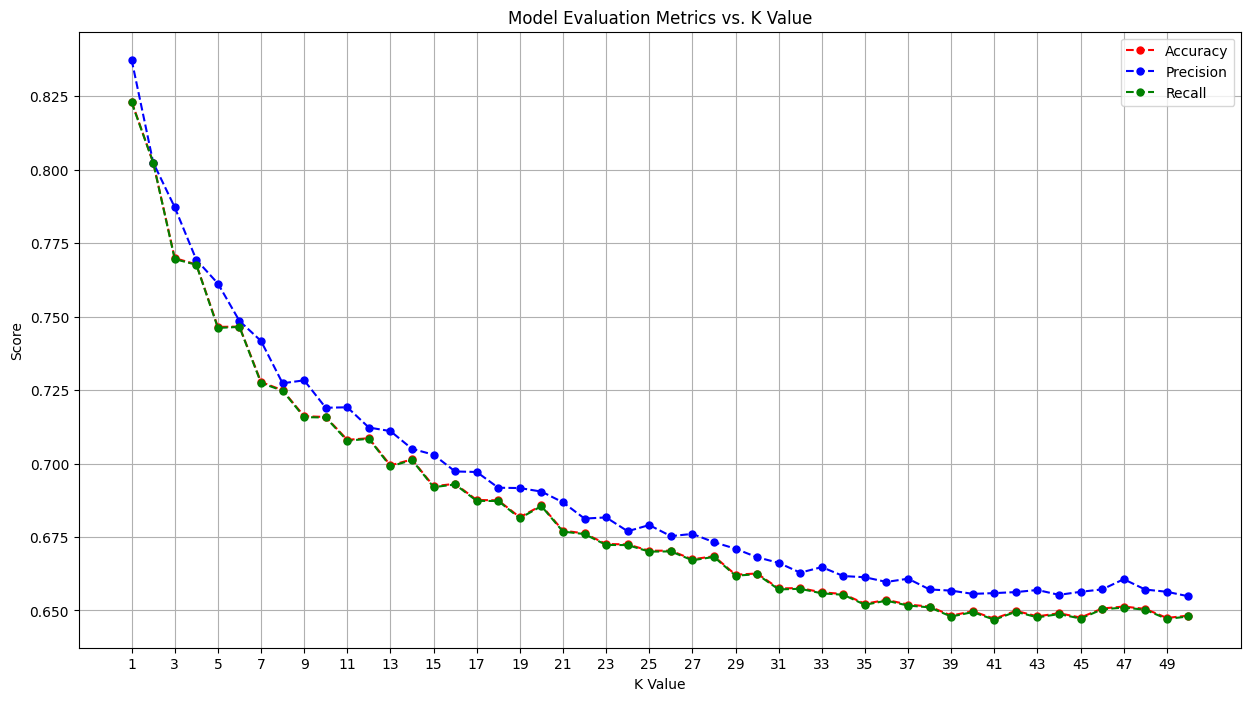

In [ ]:
plt.figure(figsize=(15, 8))
# Plot accuracy
plt.plot(range(1, 51), accuracy_list, label='Accuracy', marker='o', linestyle='dashed', markersize=5, color='red')
# Plot precision
plt.plot(range(1, 51), precision_list, label='Precision', marker='o', linestyle='dashed', markersize=5, color='blue')
# Plot recall
plt.plot(range(1, 51), recall_list, label='Recall', marker='o', linestyle='dashed', markersize=5, color='green')

plt.title('Model Evaluation Metrics vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.xticks(range(1, 51, 2))
plt.legend()
plt.grid(True)
plt.show()


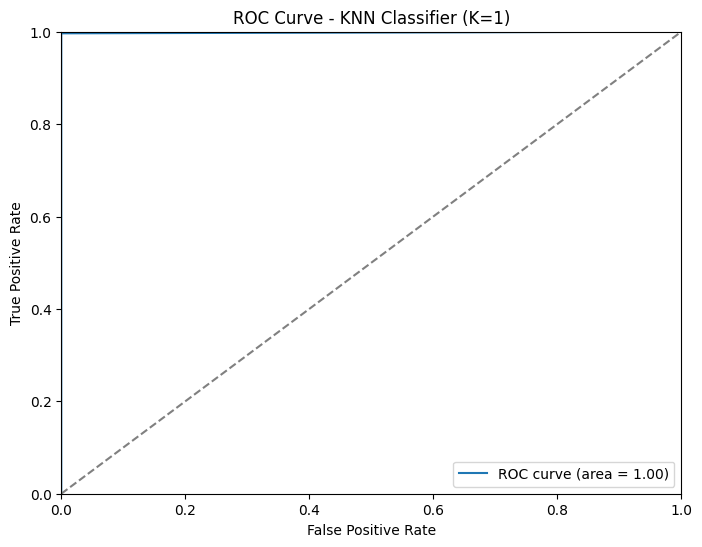

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_resampled and y_resampled are your training data after oversampling
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_resampled, y_resampled)
# y_prob should be the probability of the class of interest.
# If your positive class is the second one, you use [:, 1]
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier (K=1)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score (calculated with y_pred): {roc_auc}")
print(f"ROC-AUC Score (calculated with y_prob): {roc_auc_value}")

Accuracy: 0.6482398607950743
Precision: 0.6236178681999115
Recall: 0.7528029898558463
F1 Score: 0.6821480406386067
ROC-AUC Score (calculated with y_pred): 0.6479451190889969
ROC-AUC Score (calculated with y_prob): 0.9982648158035238


As expected, the recall has substantially improved and precision has slightly improved but at the cost of accuracy. The perfect AUC of ROC graph indicates that the model is very good at differentiating between both the classes.

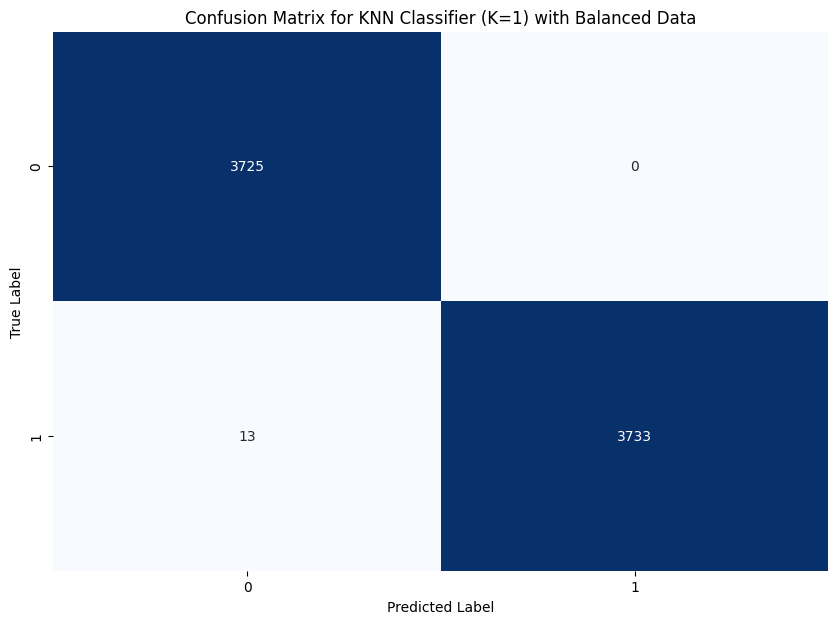

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming KNN is already imported and fitted for K=1 with oversampled data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_resampled, y_resampled)

# Generate predictions
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN Classifier (K=1) with Balanced Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Logistic Regression**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class counts after resampling
print(y_resampled.value_counts())

0    18677
1    18677
Name: willDefault, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("\nShape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (29883, 23)
Shape of X_test:  (7471, 23)

Shape of y_train:  (29883,)
Shape of y_test:  (7471,)


In [ ]:
pipeline = Pipeline(steps=[
    ('model', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', LogisticRegression(max_iter=500))])

In [ ]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

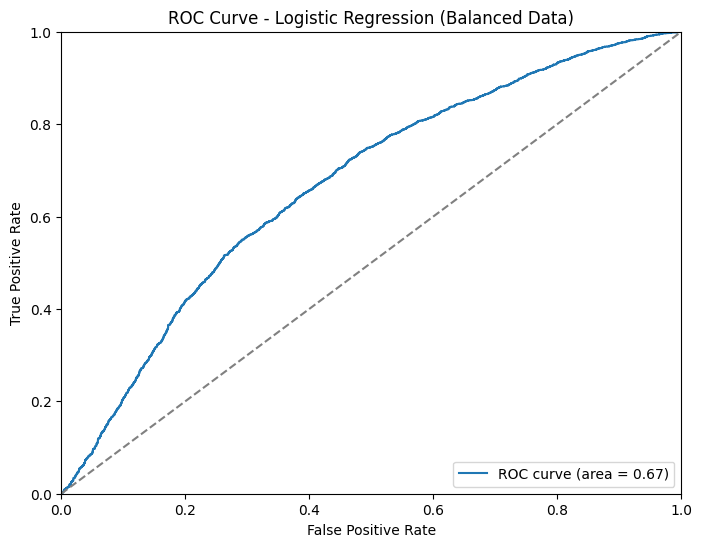

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Balanced Data)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score(y_pred): {roc_auc}")
print(f"ROC-AUC Score (y_prob): {roc_auc_value}")

Accuracy: 0.6278945254985946
Precision: 0.6051829268292683
Recall: 0.7418579818473038
F1 Score: 0.6665867114415928
ROC-AUC Score(y_pred): 0.6275732862256653
ROC-AUC Score (y_prob): 0.6687356536009774


The accuracy score of ~62% means the model predicts whether someone defaults or not correctly 62% of the time.

The precision score of .60 tells us that if the model predicts a default, that it is correct 58% of the time.

The recall score of .74 tells us that the model is able to identify 74% of defaults. The model is able to catch defaults at a relatively high rate, which in this case is valuable since those are the riskier cases.

The F1 score is .66. This is a balance of the precision and recall score. This means the model is balanced between quantity (catching lots of defaults) and quality (making sure the predictions are precise)

The ROC_AUC Score (y_pred) of .627 tells us that the model's ability to distinguish between defaulters and non-defaulters is only slightly better than average.

The ROC_AUC Score (y_prob) of .668 tells tells us that the model's ability to make predictions on which will deFault and not default is slightly better than average.

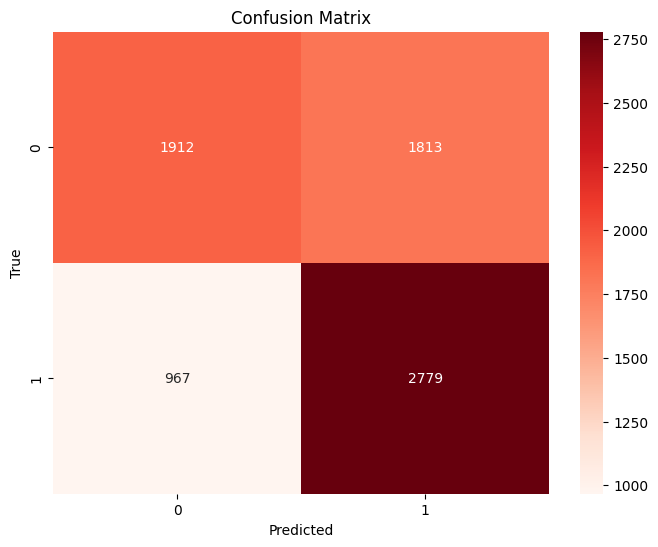

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

The model correctly predicted 1864 non-defaulters, and incorrectly predicted 1043 cases as non-defaulting. The model is decent at prediciting the non-defaulters. Simlarly, the matrix correctly predicted 2683 defaulters and incorrectly predicted 1043 defaulters. The matrix tells us that the logistic regression model is somewhat accurate. The biggest strength of this model is its recall, in this case meaning it's great at catching defaults. The downside is that there are a lot of errors from its average accuracy score and moderately low precision score.

## **Naive Bayes**



In [ ]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Print the class counts after resampling
print(y_resampled.value_counts())

0    18677
1    18677
Name: willDefault, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("\nShape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (29883, 23)
Shape of X_test:  (7471, 23)

Shape of y_train:  (29883,)
Shape of y_test:  (7471,)


In [ ]:
pipeline = Pipeline(steps=[
    ('model', GaussianNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', GaussianNB())])

In [ ]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

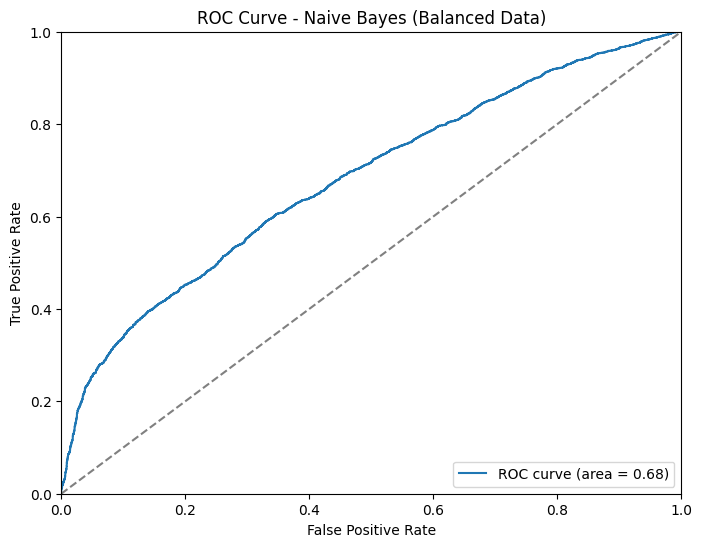

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (Balanced Data)')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows a moderate ability to distinguish between the classes with an area under the curve (AUC) of 0.69. The curve is above the diagonal line of no-discrimination, but there is room for improvement, as a higher AUC closer to 1 would indicate better performance.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score(y_pred): {roc_auc}")
print(f"ROC-AUC Score (y_prob): {roc_auc_value}")

Accuracy: 0.5497256056752777
Precision: 0.5286185196284088
Recall: 0.9418045915643353
F1 Score: 0.6771593090211132
ROC-AUC Score(y_pred): 0.5486204165875368
ROC-AUC Score (y_prob): 0.6799487596613121


This model has a very high recall score. The accuracy and precision percentages have also increased by a considerable margin.

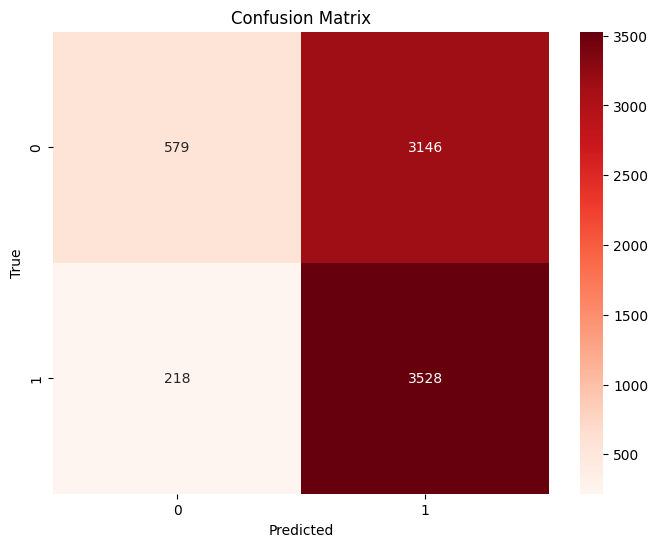

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix indicates the model has a high number of true positives (1830) and true negatives (321), but there are also significant misclassifications, with 121 false negatives and 1572 false positives. This suggests that while the model is good at identifying actual positives, it tends to incorrectly predict many negatives as positives.






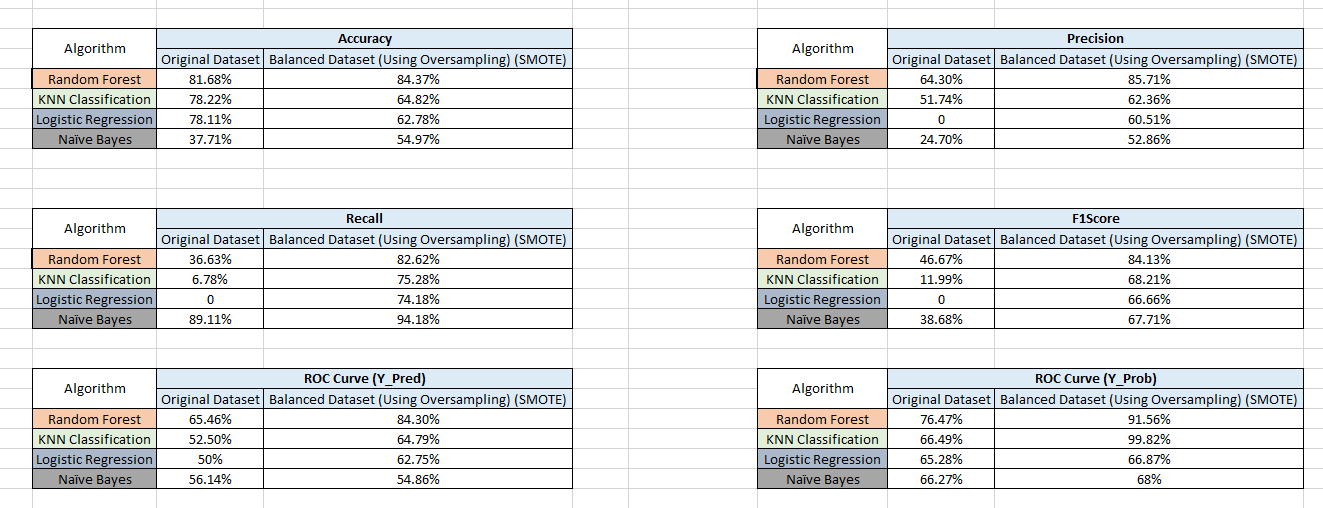

**Conclusion**: The models had a higher accuracy on the original dataset than on the oversampled dataset. Due to the imbalance in the dataset, the precsion, recall,F1scores were not great. A model is not always determined to be the best only based on accuracy. Having a good precision, recall and F1 scores are important. Based on the context, one could chose the model that serves their purpoes the best.

Let us understand this with an example. Suppose a credit card company has two departments.

**Department A: New Credit / Loan Approval**
Prefers Precision
***Why Precision Matters:***

***Goal:*** Avoid mistakenly denying credit to people who would pay back

***Problem With Being Wrong:*** If they incorrectly predict/label someone as a potential defaulter, they might be denied new credit/loans unfairly

***What to do:***They need to be sure when they predict/label someone as a potential defaulter.

***Result:***Fewer mistakes => Fewer people would be denied credit unfairly => Happy Customers


-------------------------------------------------------------------------------


**Department B: Crdit Risk Management**
Prefers Recall

***Why Recall Matters:***

***Goal:*** Catch every person likely to default to prevent financial losses
Problem With Missing someone: If they miss someone who will likely default, it could lead to financial losses for the company.

***What to do:***They  need to make sure they catch as many potential defaulters as possible.

***Result:***Catching more potential defaulters => Less Financial Risk => Happy Stakeholders
--------------------------------------------------------------------------------




1)**Random forest**

Precision and recall were significantly improved on performing oversampling.

Shows good accuracy, precision, recall.

Good to be used by both Department A and B



2)**KNN**
Poor performance(Recall) when performed on the original dataset due to the domination of one of the classes (Imbalanced Dataset)

Has a better recall than precision.Good to be used by Department B

3)**Logistic Regression**

Poor performance  when performed on the original dataset due to the domination of one of the classes (Imbalanced Dataset)

Has a better recall than precision.Good to be used by Department B



4)**Naive Bayes** has the best recall but has sub-par accuracy.

If recall is the only requirement, the company could go ahead with this model.

Has the best recall among all the models but has a low precision and accuracy.Good to be used by Department B.

***The overall performance of the different models could be improved by doing a more careful feature selection, better sampling, hyperparameter tuning, etc***

# **Unsupervised Learning Algorithms**

## **K Means Clustering**

**K Means Clustering all data**

In [ ]:
from sklearn.cluster import KMeans

In this section we will be running the kmeans clustering algorithm across all features present in our dataset. Before we can run the algorithm we must first determing a value for K and to do that we will utilize the elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

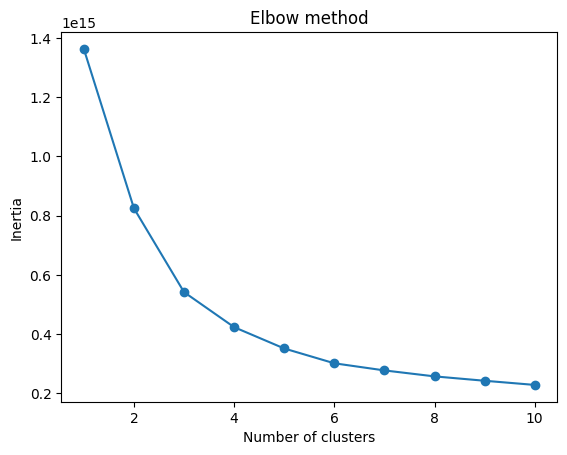

In [ ]:
#Kmeans sources: https://www.w3schools.com/python/python_ml_k-means.asp , https://www.youtube.com/watch?v=iNlZ3IU5Ffw

kdata = df

inertias = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(kdata)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Upon running the elbow method on our dataset we can determing what value to use for K. First we must find which amount of cluster will give us a lower consistant intertia value. Here we clearly see that after 3 clusters the intertia begins to drop and so our value for K should be 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


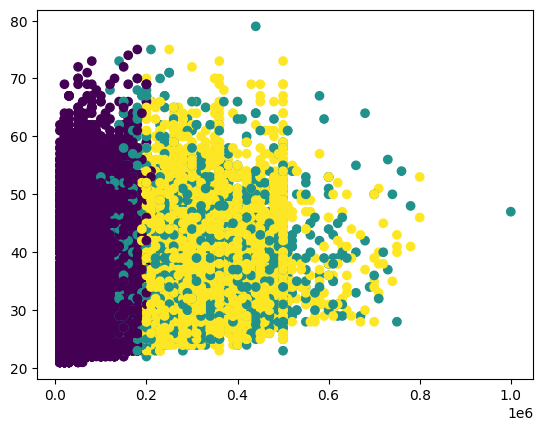

In [ ]:
#K should equal 3 based on our elbow method

kmeans = KMeans(n_clusters=3)
kmeans.fit(kdata)
kdata["results"] = kmeans.labels_
kdata.head()

plt.scatter(x=kdata['amt_credit'],y=kdata['age'],c=kdata['results'])
plt.show()

The figure above depicts the clustering that our algorithm generated with a K value of 3. We use the two features age and credit limit to see how the clustering generated relative to these features. We notice that the magnitude of the features we are accounting for is so great, that it makes the visual difficult to interpret. We can still determine that credit limit is one of the features used by the algorithm for clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

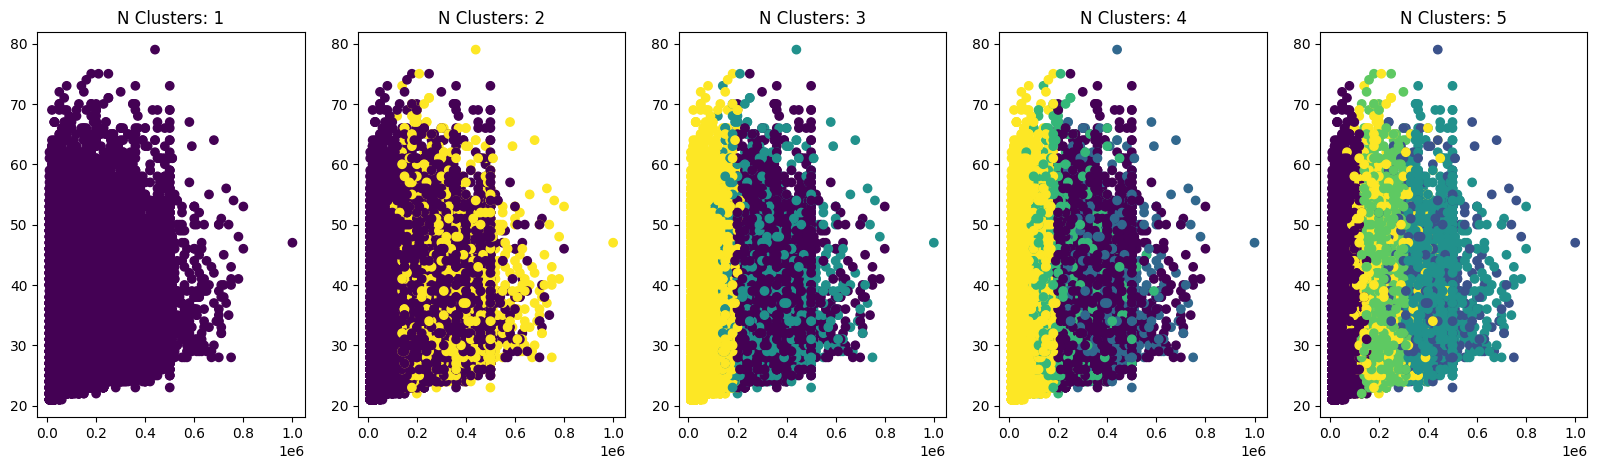

In [ ]:
for k in range(1,6):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(kdata)
  kdata[f'KMeans_{k}'] = kmeans.labels_

test, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i, ax in enumerate(test.axes, start=1):
  ax.scatter(x=kdata['amt_credit'],y=kdata['age'],c=kdata[f'KMeans_{i}'])
  ax.set_title(f'N Clusters: {i}')

In this figure we run the k means algorithm with different values of k to see how the algorithm progressivly clusters the given data. Again we notice that the amount of features we are measuring is affecting how we are able to interpret our data. So we will be carefully selecting features that are relevent to our study to gain a better analysis of our data and then run the K means algorithm again given our new dataset.

**K Means Clustering Custom Data**

In this section we will be conducting the Kmeans clustering algorithm using specific features we determined to be relevent to the analysis of the data. These selected features are refered to a "custom" for this model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

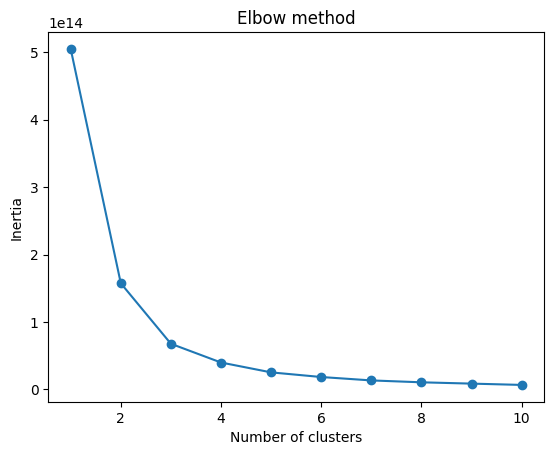

In [ ]:
#Kmeans sources: https://www.w3schools.com/python/python_ml_k-means.asp , https://www.youtube.com/watch?v=iNlZ3IU5Ffw

kdata_c = df[["amt_credit","gender","education","marital_status","age","willDefault"]]

inertias = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(kdata_c)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Through using the elbow method we are able to visually see when the inertias  begin to decline, this will assist us in determining our value of K before clustering. Here we can clearly see that the value of 3 will be ideal for our dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-83-b70008e9b643>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdata_c["KMeans_3"] = kmeans.labels_


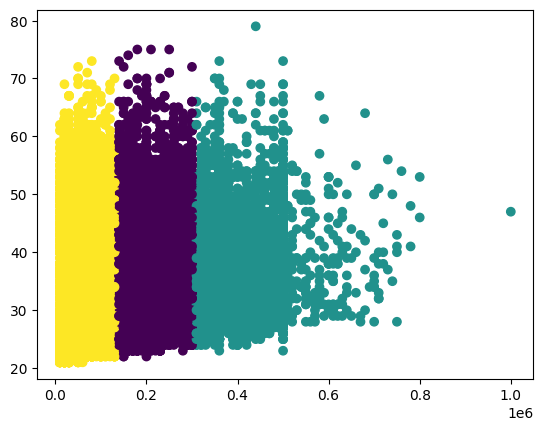

In [ ]:
#K should equal 3 based on our elbow method

kmeans = KMeans(n_clusters=3)
kmeans.fit(kdata_c)
kdata_c["KMeans_3"] = kmeans.labels_
kdata_c.head()

plt.scatter(x=kdata_c['amt_credit'],y=kdata_c['age'],c=kdata_c['KMeans_3'])
plt.show()

#plt.scatter(x=kdata_c['amt_credit'],y=kdata_c['marital_status'],c=kdata_c['KMeans_3'])
#plt.show()

#plt.scatter(x=kdata_c['willDefault'],y=kdata_c['education'],c=kdata_c['KMeans_3'])
#plt.show()

#plt.scatter(x=kdata_c['gender'],y=kdata_c['amt_credit'],c=kdata_c['KMeans_3'])

#plt.show()

#Ignores gender, age, marital status
#Maybe credit amount, education, default chance

In the figure above we can clearly see that the data has been partitioned into 3 clear groups. We notice that in this figure the clustering does not coincide with age, but instead with the individuals credit values.



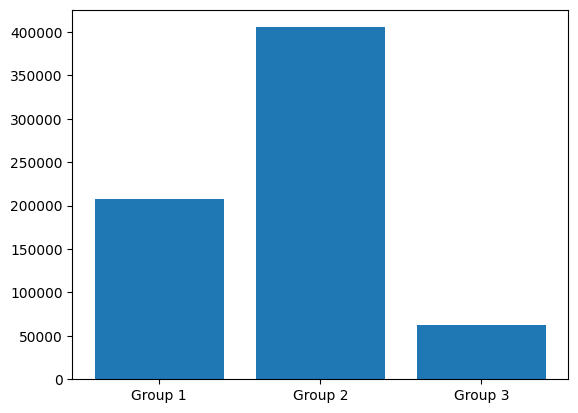

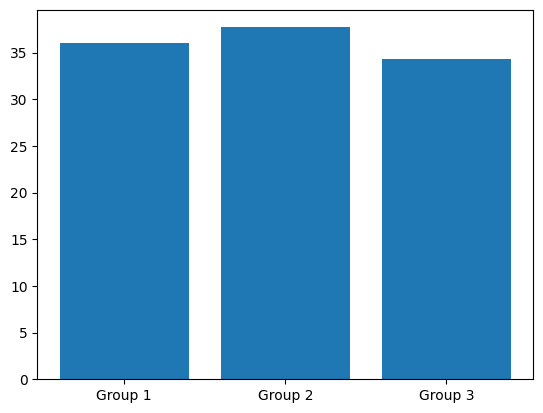

0    9017
1    1879
Name: willDefault, dtype: int64
0    3958
1     605
Name: willDefault, dtype: int64
0    10389
1     4152
Name: willDefault, dtype: int64


In [ ]:
group1 = kdata_c[kdata_c["KMeans_3"] == 0] #4563 people
group2 = kdata_c[kdata_c["KMeans_3"] == 1] #14541 people
group3 = kdata_c[kdata_c["KMeans_3"] == 2] #10896 people

plt.bar(["Group 1","Group 2","Group 3"],[group1['amt_credit'].mean(),group2['amt_credit'].mean(),group3['amt_credit'].mean()])
plt.show()

plt.bar(["Group 1","Group 2","Group 3"],[group1['age'].mean(),group2['age'].mean(),group3['age'].mean()])
plt.show()

print(group1['willDefault'].value_counts())
print(group2['willDefault'].value_counts())
print(group3['willDefault'].value_counts())


In this section we conduct basic analysis to determing exactly what criteria the algoritm used to label each group. We specifically notice that age is not a leading factor, but instead their credit limit and likeliness to default on a payment were a deciding factor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-85-0c955d6837c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdata_c[f'KMeans_{k}'] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-85-0c955d6837c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

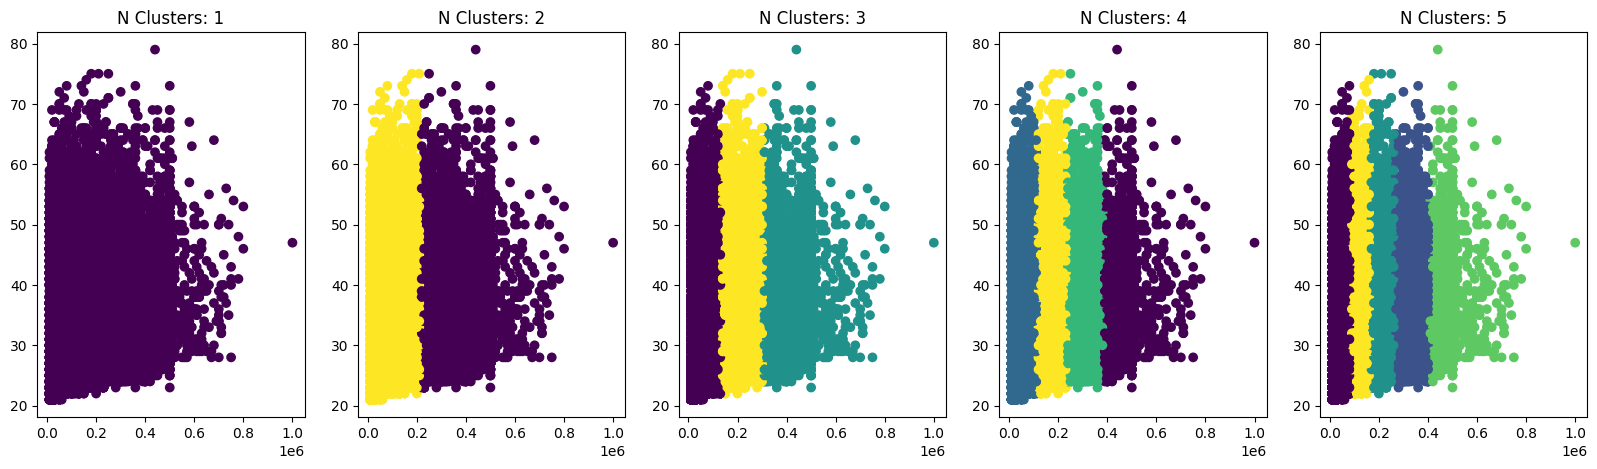

In [ ]:
for k in range(1,6):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(kdata_c)
  kdata_c[f'KMeans_{k}'] = kmeans.labels_

test, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i, ax in enumerate(test.axes, start=1):
  ax.scatter(x=kdata_c['amt_credit'],y=kdata_c['age'],c=kdata_c[f'KMeans_{i}'])
  ax.set_title(f'N Clusters: {i}')

#test2, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))
#for i, ax in enumerate(test2.axes, start=1):
#  ax.scatter(x=kdata_c['amt_credit'],y=kdata_c['marital_status'],c=kdata_c[f'KMeans_{i}'])
#  ax.set_title(f'N Clusters: {i}')

#test3, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))
#for i, ax in enumerate(test3.axes, start=1):
#  ax.scatter(x=kdata_c['willDefault'],y=kdata_c['education'],c=kdata_c[f'KMeans_{i}'])
#  ax.set_title(f'N Clusters: {i}')

#test4, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))
#for i, ax in enumerate(test4.axes, start=1):
#  ax.scatter(x=kdata_c['gender'],y=kdata_c['amt_credit'],c=kdata_c[f'KMeans_{i}'])
#  ax.set_title(f'N Clusters: {i}')

Here we can get additional insight on exactly how the algorithm decided to group each point as we progressivly increase the value of K and perform the algorithm. Visually we notice that as the amount of generated clusters grow, the concentration of each group in respect to credit limit increases.

**Contributions:**

Abhishek Sai Surisetty: Data Cleaning, EDA, Random Forest, Supervising  multiple parts of the project.

Tommy Grounds:EDA, K Means Clustering

Ritish Chilkepalli: EDA, KNN

Shashank Subramanian:EDA, Logistic Regression

Alan Ngo: EDA, Naive Bayes
